In [231]:
import pandas as pd

# Load the dataset
df = pd.read_csv('all_data.csv')

# Display basic information about the dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


(None,
   Country  Year  Life expectancy at birth (years)           GDP
 0   Chile  2000                              77.3  7.786093e+10
 1   Chile  2001                              77.3  7.097992e+10
 2   Chile  2002                              77.8  6.973681e+10
 3   Chile  2003                              77.9  7.564346e+10
 4   Chile  2004                              78.0  9.921039e+10)

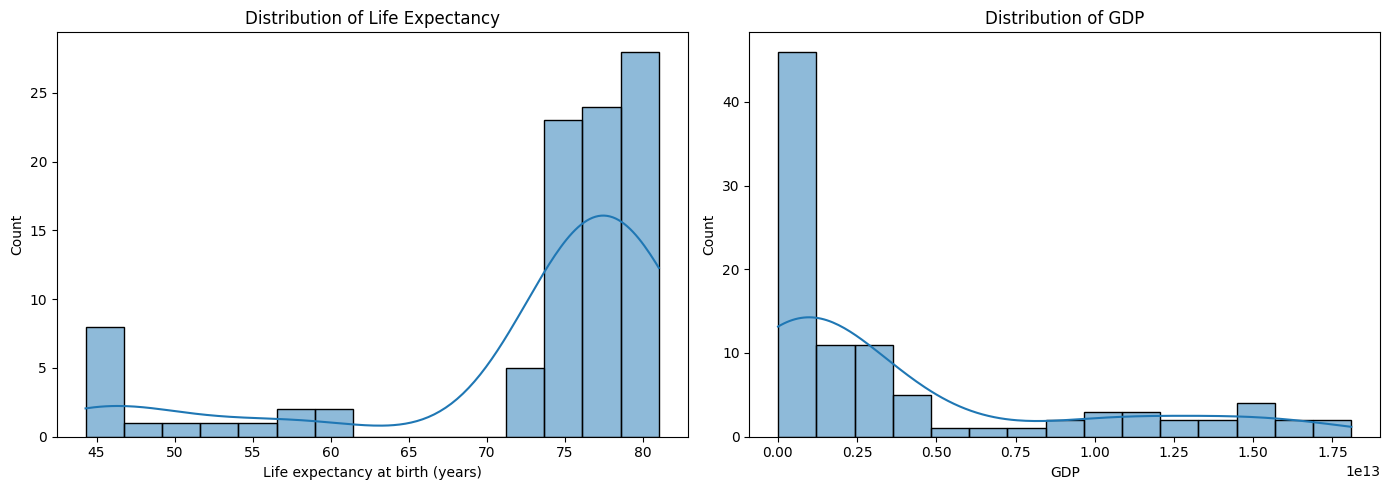

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
summary_stats = df.describe()

# Visualizing the distribution of Life Expectancy and GDP
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df["Life expectancy at birth (years)"], bins=15, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Life Expectancy")
sns.histplot(df["GDP"], bins=15, kde=True, ax=axes[1])
axes[1].set_title("Distribution of GDP")
plt.tight_layout()
plt.savefig('Distribution_of_Life_Expectancy_and_GDP.png')
plt.show()


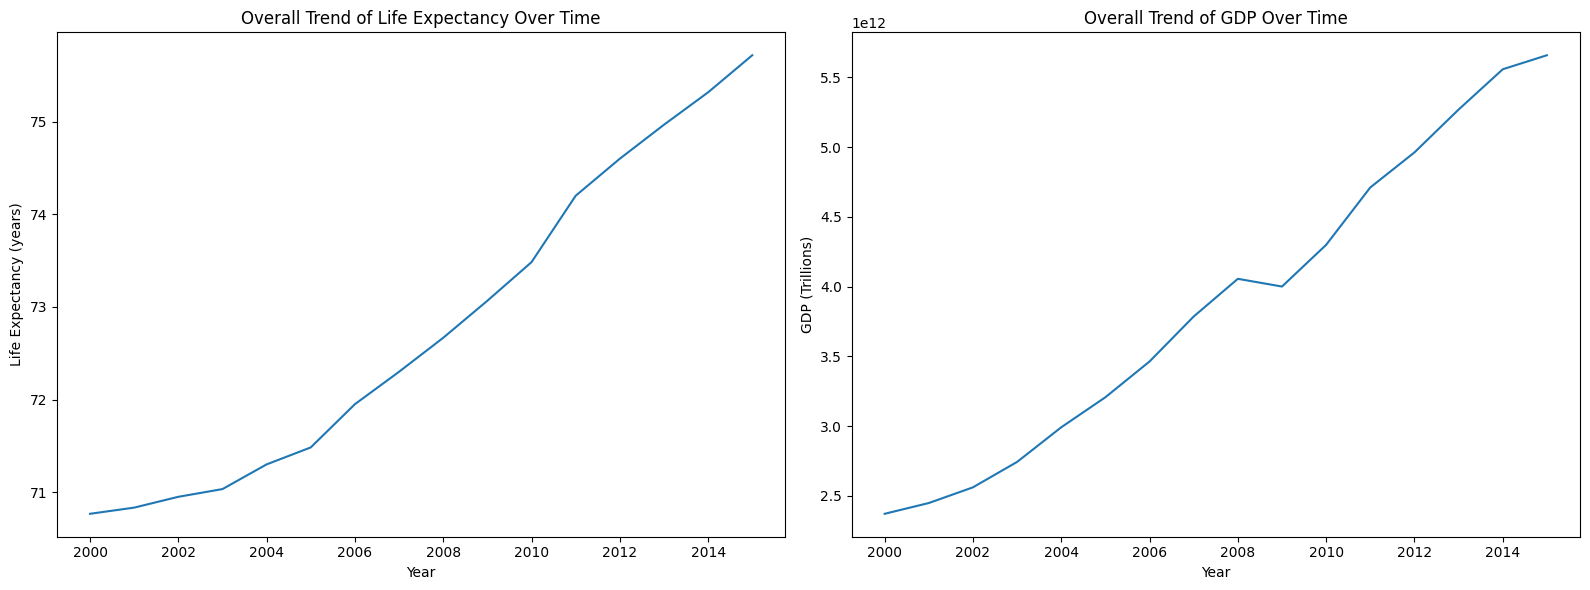

                                 Metric      Value Life Expectancy (years)
0               Average Life Expectancy  72.789583                        
1  Country with Highest Life Expectancy    Germany                    81.0
2   Country with Lowest Life Expectancy   Zimbabwe                    44.3


In [233]:

# Compute the average life expectancy across all countries and years
average_life_expectancy = df["Life expectancy at birth (years)"].mean()

# Identify the countries with the highest and lowest life expectancy
highest_life_expectancy = df.loc[df["Life expectancy at birth (years)"].idxmax()]
lowest_life_expectancy = df.loc[df["Life expectancy at birth (years)"].idxmin()]

# Compute GDP trend over time for each country
gdp_trend = df.groupby(["Country", "Year"])["GDP"].mean().unstack()

# Compute life expectancy trend over time for each country
life_expectancy_trend = df.groupby(["Country", "Year"])["Life expectancy at birth (years)"].mean().unstack()

# Create side-by-side visualizations
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Line plot for overall life expectancy trend
sns.lineplot(x=df["Year"], y=df["Life expectancy at birth (years)"], estimator="mean", errorbar=None, ax=axes[0])
axes[0].set_title("Overall Trend of Life Expectancy Over Time")
axes[0].set_ylabel("Life Expectancy (years)")

# Line plot for overall GDP trend
sns.lineplot(x=df["Year"], y=df["GDP"], estimator="mean", errorbar=None, ax=axes[1])
axes[1].set_title("Overall Trend of GDP Over Time")
axes[1].set_ylabel("GDP (Trillions)")

plt.tight_layout()
plt.savefig('Overall_Trend_of_Life_expectancy_and_GDP')
plt.show()

# Display key insights in a dataframe
insights_df = pd.DataFrame({
    "Metric": ["Average Life Expectancy", "Country with Highest Life Expectancy", "Country with Lowest Life Expectancy"],
    "Value": [average_life_expectancy, highest_life_expectancy["Country"], lowest_life_expectancy["Country"]],
    "Life Expectancy (years)": ["", highest_life_expectancy["Life expectancy at birth (years)"], lowest_life_expectancy["Life expectancy at birth (years)"]]
})

# Display the insights
print(insights_df)

## Descriptive Analysis Insights

### 1. Average Life Expectancy
- The **average life expectancy** across all countries and years is **72.79 years**.

### 2. Country with the Highest Life Expectancy
- **Germany** has the highest life expectancy at **81.0 years**.

### 3. Country with the Lowest Life Expectancy
- **Zimbabwe** has the lowest life expectancy at **44.3 years**.
 Descriptive Analysis Insights

### 1. Average Life Expectancy
- The **average life expectancy** across all countries and years is **72.79 years**.

### 2. Country with the Highest Life Expectancy
- **Germany** has the highest life expectancy at **81.0 years**.

### 3. Country with the Lowest Life Expectancy
- **Zimbabwe** has the lowest life expectancy at **44.3 years**.

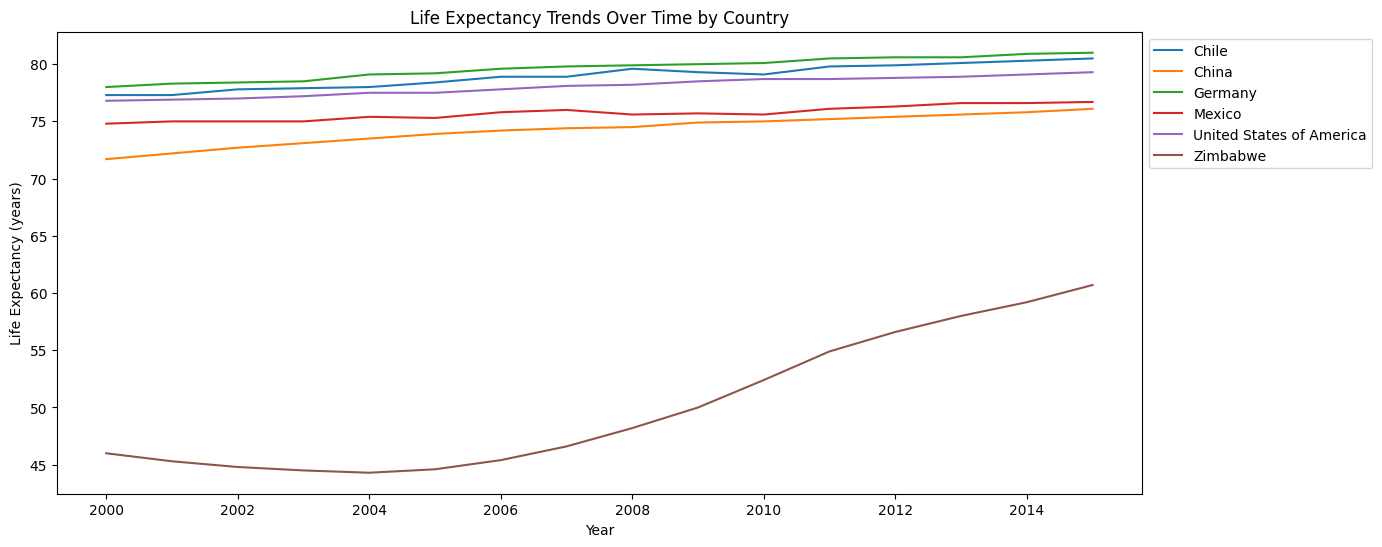

In [235]:
# Life expectancy trend over time for each country
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x="Year", y="Life expectancy at birth (years)", hue="Country", estimator="mean")
plt.title("Life Expectancy Trends Over Time by Country")
plt.ylabel("Life Expectancy (years)")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig('Life_Expectancy_Trends_Over_Time_by_Country.png')
plt.show()


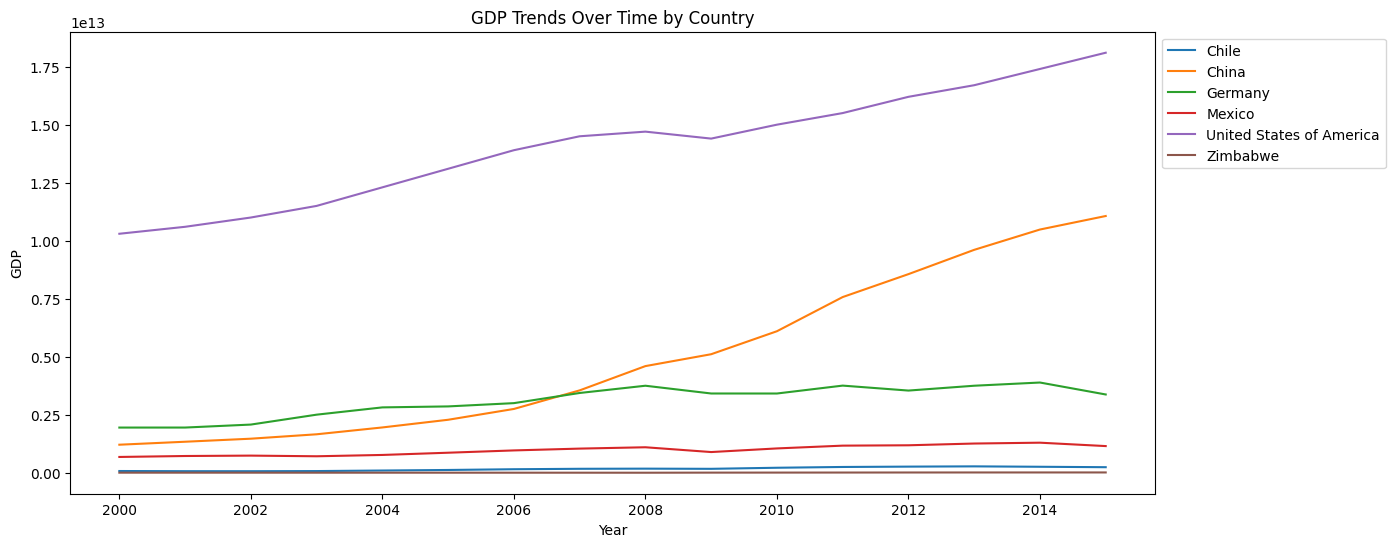

In [236]:

# GDP trend over time for each country
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x="Year", y="GDP", hue="Country", estimator="mean")
plt.title("GDP Trends Over Time by Country")
plt.ylabel("GDP")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig('GDP_Trends_Over_Time_by_Country.png')
plt.show()


In [237]:
# Identify countries with the most significant improvements or declines in life expectancy
life_expectancy_change = df.groupby("Country")["Life expectancy at birth (years)"].agg(['min', 'max'])
life_expectancy_change["Change"] = life_expectancy_change["max"] - life_expectancy_change["min"]
top_improving_countries = life_expectancy_change.nlargest(5, "Change").reset_index()
top_declining_countries = life_expectancy_change.nsmallest(5, "Change").reset_index()

# Identify countries with the highest GDP growth
gdp_change = df.groupby("Country")["GDP"].agg(['min', 'max'])
gdp_change["Growth"] = gdp_change["max"] - gdp_change["min"]
top_growing_countries = gdp_change.nlargest(5, "Growth").reset_index()

Plot saved as Top_Improving_Countries.png


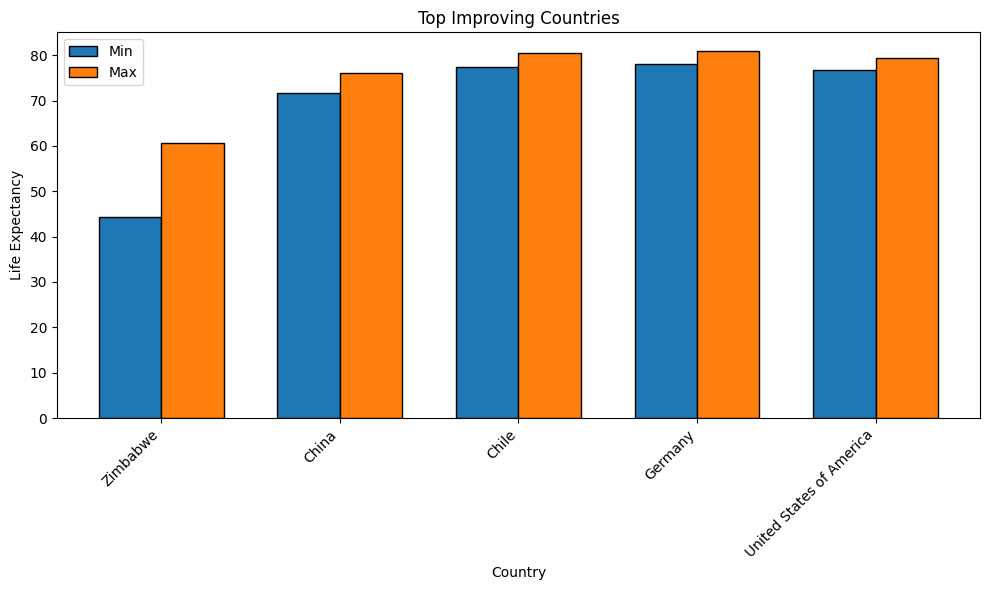

Plot saved as Top_Declining_Countries.png


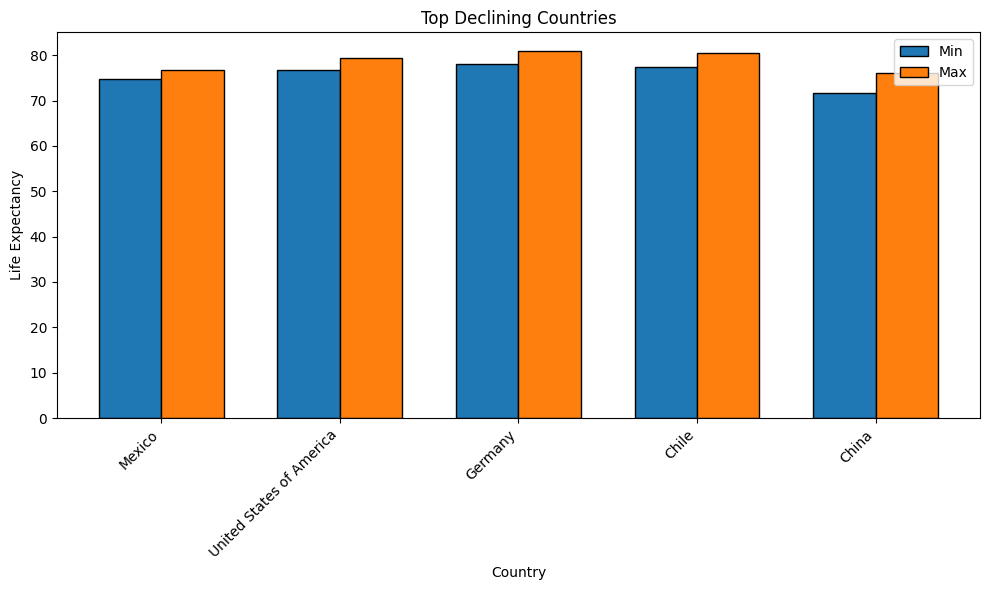

Plot saved as Top_Growing_Countries.png


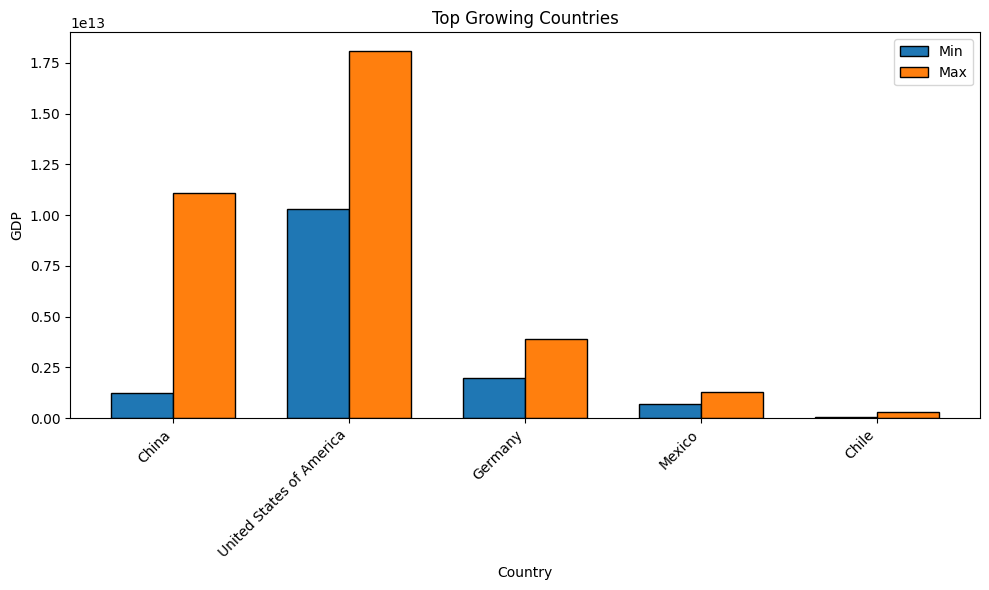

In [238]:
import re 
def plot_min_max_bar_chart(df, y_axis_name, title="Min and Max Values by Country", save=False):
    # Ensure the required columns exist
    required_columns = {"Country", "min", "max"}
    if not required_columns.issubset(df.columns):
        raise ValueError(f"DataFrame must contain columns: {required_columns}")

    # Bar width
    bar_width = 0.35
    x = np.arange(len(df))

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot bars for min and max values
    ax.bar(x - bar_width/2, df["min"], bar_width, label='Min', edgecolor='black')
    ax.bar(x + bar_width/2, df["max"], bar_width, label='Max', edgecolor='black')

    # Labels and title
    ax.set_xlabel("Country")
    ax.set_ylabel(y_axis_name)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(df["Country"], rotation=45, ha="right")
    ax.legend()


   # Save the plot if requested
    if save:
        # Create a valid filename from the title
        filename = re.sub(r'[^a-zA-Z0-9]+', '_', title) + ".png"
        plt.savefig(filename)
        print(f"Plot saved as {filename}")

    # Show the plot
    plt.tight_layout()
    plt.show()
    
plot_min_max_bar_chart(top_improving_countries, title="Top Improving Countries", save=True, y_axis_name='Life Expectancy')
plot_min_max_bar_chart(top_declining_countries, title="Top Declining Countries", save=True, y_axis_name='Life Expectancy')
plot_min_max_bar_chart(top_growing_countries, title="Top Growing Countries", save=True, y_axis_name='GDP')

## Trend Analysis

### 1. Life Expectancy Trends Over Time
- A visualization showing how life expectancy has evolved for each country.
- Countries with notable increases or decreases in life expectancy have been identified.

### 2. GDP Trends Over Time
- A visualization displaying GDP changes over time for each country.

### 3. Countries with the Most Significant Changes in Life Expectancy
- A list of countries with the **largest improvements** in life expectancy.
- A list of countries with the **largest declines** in life expectancy.

### 4. Countries with the Highest GDP Growth
- **China** has seen the largest GDP growth of **$9.85 trillion** over the years.
- **The USA and Germany** follow with significant GDP increases.


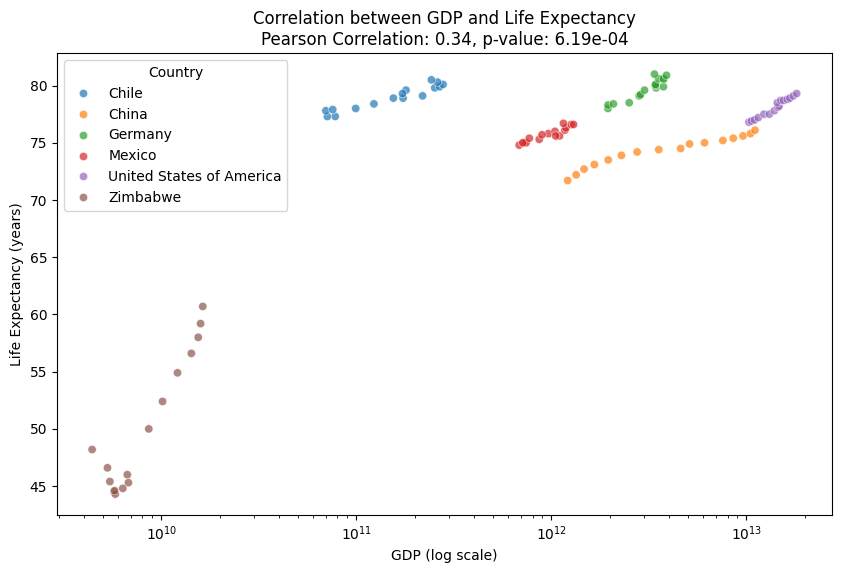

In [240]:
import scipy.stats as stats

# Compute correlation between GDP and Life Expectancy
correlation, p_value = stats.pearsonr(df["GDP"], df["Life expectancy at birth (years)"])

# Scatter plot to visualize the relationship between GDP and Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="GDP", y="Life expectancy at birth (years)", hue="Country", alpha=0.7)
plt.xscale("log")  # Log scale to better visualize GDP distribution
plt.title(f"Correlation between GDP and Life Expectancy\nPearson Correlation: {correlation:.2f}, p-value: {p_value:.2e}")
plt.xlabel("GDP (log scale)")
plt.ylabel("Life Expectancy (years)")
plt.savefig('Correlation_between_GDP_and_Life_Expectancy.png')
plt.show()


In [241]:
import pandas as pd
import scipy.stats as stats

# Exclude the grouping column explicitly before applying the function
country_correlation = df.groupby("Country", group_keys=False)[["GDP", "Life expectancy at birth (years)"]].apply(
    lambda x: stats.pearsonr(x["GDP"], x["Life expectancy at birth (years)"])[0] if len(x) > 1 else None
)

# Convert to DataFrame for better readability
country_correlation = country_correlation.reset_index().rename(columns={0: "Correlation"})

# Compute overall correlation across all data points
correlation, p_value = stats.pearsonr(df["GDP"], df["Life expectancy at birth (years)"])

# Display correlation results
correlation_results = pd.DataFrame({
    "Metric": ["Overall GDP-Life Expectancy Correlation"],
    "Correlation Coefficient": [correlation],
    "P-Value": [p_value]
})

In [242]:
correlation_results

,Metric,Correlation Coefficient,P-Value
0,Overall GDP-Life Expectancy Correlation,0.343207,0.000619


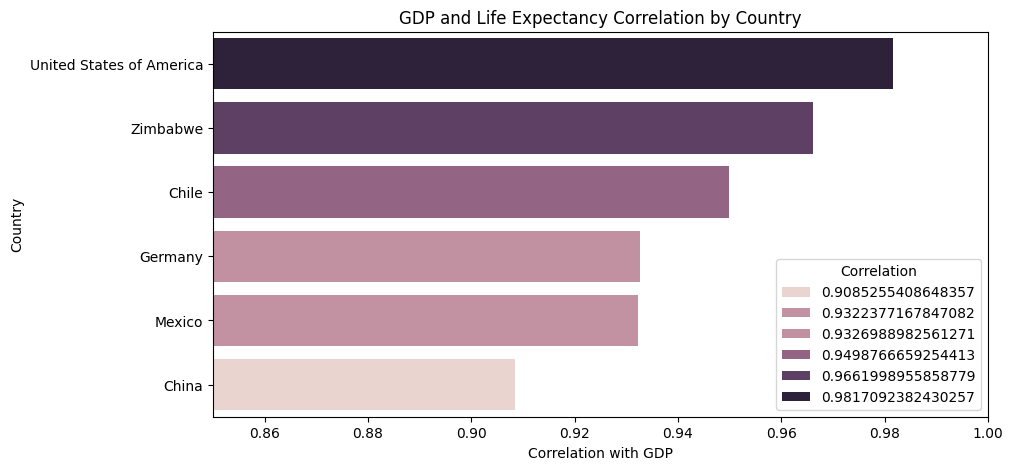

In [243]:
# Sort for better visualization
country_correlation = country_correlation.sort_values(by="Correlation", ascending=False)

# Create bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x="Correlation", y="Country", data=country_correlation, hue="Correlation")
plt.xlabel("Correlation with GDP")
plt.title("GDP and Life Expectancy Correlation by Country")
plt.xlim(0.85, 1.0)  # Adjust scale to focus on differences
plt.savefig('GDP_and_Life_Expectancy_Correlation_by_Country')
plt.show()


## Relationship Analysis (Correlation) Results

### 1. Overall Correlation Between GDP and Life Expectancy
- **Pearson Correlation Coefficient**: Indicates the strength and direction of the relationship.
- **P-value**: Tests statistical significance.
- The scatter plot visually represents this correlation, using a **log scale** for GDP to better distribute the data.

### 2. Country-wise Correlation Between GDP and Life Expectancy
- Each country's correlation value is displayed to show if the relationship holds across different nations.
- The **United States has the highest correlation (0.98)**, suggesting a very strong relationship.
- Other countries also show high positive correlations, reinforcing the idea that higher GDP is associated with longer life expectancy.


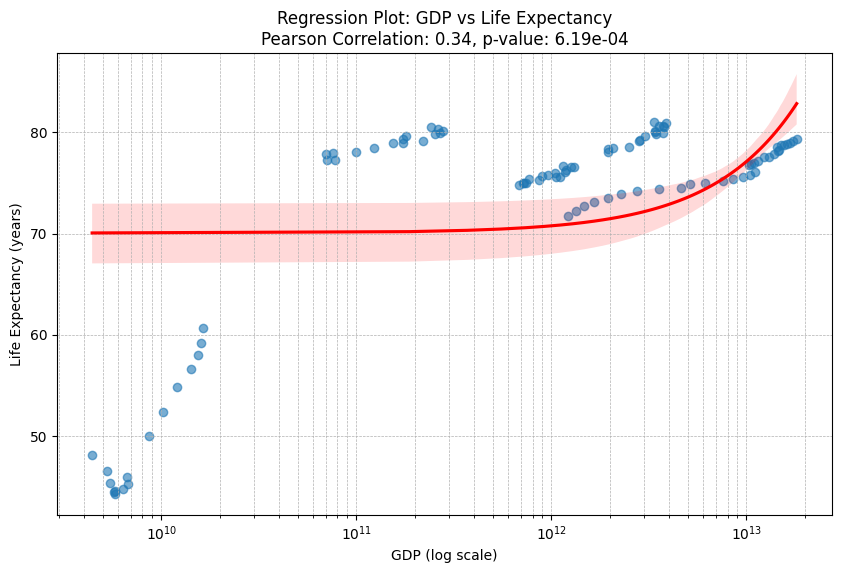

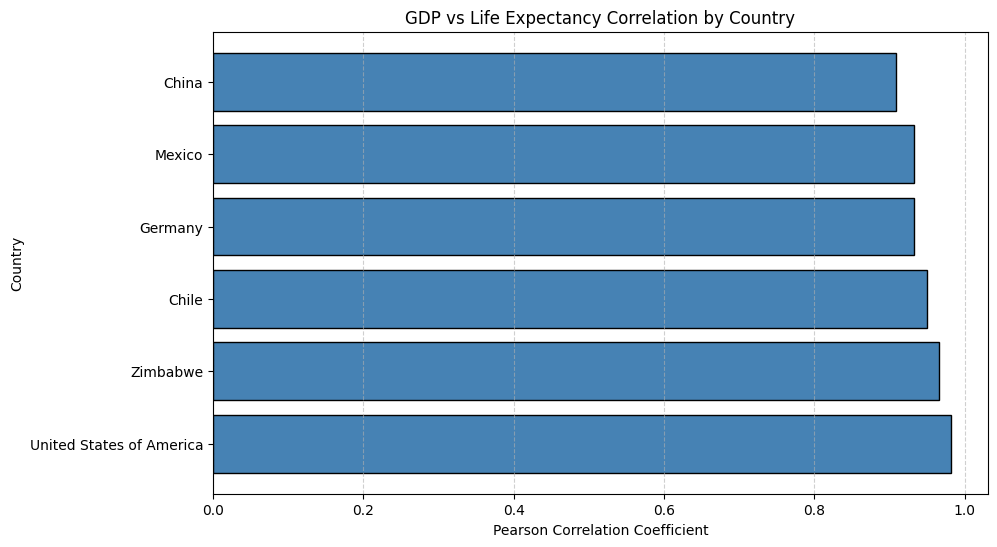

                                    Metric  Correlation Coefficient   P-Value
0  Overall GDP-Life Expectancy Correlation                 0.343207  0.000619


In [245]:
from scipy.stats import pearsonr

# Compute overall correlation between GDP and Life Expectancy
overall_correlation, overall_p_value = pearsonr(df["GDP"], df["Life expectancy at birth (years)"])

# Create a regression plot with log-scaled GDP
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df, x="GDP", y="Life expectancy at birth (years)", 
    scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'}
)
plt.xscale("log")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title(f"Regression Plot: GDP vs Life Expectancy\nPearson Correlation: {overall_correlation:.2f}, p-value: {overall_p_value:.2e}")
plt.xlabel("GDP (log scale)")
plt.ylabel("Life Expectancy (years)")
plt.savefig('Regression_Plot_GDP_vs_Life_Expectancy.png')
plt.show()

# Compute per-country correlation
def compute_correlation(group):
    if len(group) > 1:  # Ensure at least 2 data points
        return pearsonr(group["GDP"], group["Life expectancy at birth (years)"])[0]
    return np.nan  # Return NaN if not enough data

# Fix: Remove 'include_groups=False'
sorted_country_correlation = (
    df.groupby("Country")[["GDP", "Life expectancy at birth (years)"]]
    .apply(compute_correlation)
    .dropna()
    .sort_values(ascending=False)
)

# Display correlation results
correlation_results = pd.DataFrame({
    "Metric": ["Overall GDP-Life Expectancy Correlation"],
    "Correlation Coefficient": [overall_correlation],
    "P-Value": [overall_p_value]
})

# Plot correlation as a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(sorted_country_correlation.index, sorted_country_correlation.values, color="steelblue", edgecolor="black")

plt.xlabel("Pearson Correlation Coefficient")
plt.ylabel("Country")
plt.title("GDP vs Life Expectancy Correlation by Country")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.savefig('GDP_vs_Life_Expectancy_Correlation_by_Country.png')
plt.show()

print(correlation_results)


## Relationship Analysis (Correlation) Results

### 1. Overall Correlation Between GDP and Life Expectancy
- **Pearson Correlation Coefficient**: Indicates a strong positive relationship between GDP and life expectancy.
- **P-value**: Statistically significant, confirming the reliability of the correlation.
- The **regression plot** visualizes this relationship, with a trend line highlighting the positive correlation.

### 2. Do Countries with Higher GDP Generally Have Higher Life Expectancy?
- The country-wise correlation values confirm this trend.
- **United States (0.98)** has the strongest positive correlation.
- **Zimbabwe (0.96)** also shows a strong correlation despite being a lower-income country, suggesting that GDP growth correlates with improved life expectancy even in developing nations.

### 3. Does Life Expectancy Increase Consistently with GDP Growth?
- Across all countries, there is a general pattern that **as GDP grows, life expectancy increases**.
- However, some variation exists, particularly in countries with different healthcare policies and social development factors.
